# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Wednesday, March 15, 2023 at 11:59pm**

Note: this is an incomplete version. Complete version was submitted.

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<class 'ModuleNotFoundError'>: No module named 'seaborn'

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 3. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). **Make sure you explain your decisions whenever necessary.** 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a customer will cancel the reservation they have made at a hotel. 
For this problem, you will use [Reservation Cancellation Prediction Dataset](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). In this data set, there are about 18.000 examples and 18 features (including the target), and the goal is to estimate whether a person will cancel their booking; this column is labeled "booking_status" in the data (1 = canceled). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

Answer 1.
This seems like a useful and easily applicable prediction problem. The dataset is not too high-dimensional, with only 18 features, and has quite a lot of samples (18,000) - meaning models that suffer from the 'curse of dimensionality' could potentially be used, and there will likely not be a problem with having small validation splits. The variable 'Booking_ID' should likely be dropped, as it is a unique value that is unlikely to be useful in prediction. 

In [2]:
#based on hw5
df = pd.read_csv("./data/train__dataset.csv", encoding="utf-8")

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [3]:
#based on hw5

train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

<class 'NameError'>: name 'train_test_split' is not defined

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

**View a sample of the dataset**

In [4]:
train_df.head()

<class 'NameError'>: name 'train_df' is not defined

**Look at the data types of each feature**

Below it is shown that all the features are encoded as numbers. However, from the feature descriptions on the dataset page it is apparent that some features (e.g. type_of_meal_plan, room_type_reserved) are actually categorical or binary, not numerical.

In [5]:
train_df.info()

<class 'NameError'>: name 'train_df' is not defined

**Check for missing values**

It appears from the above that there are no missing values, but this is checked below:

In [6]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Look at summary statistics for each feature**

The table below gives summary statistics including mean, stdev, and values at the 0th, 25th, 50th, 75th and 100th percentile.
Note that these statistics are not meaningful for all the features, as some are categorical or binary.

In [7]:
train_df.describe()

<class 'NameError'>: name 'train_df' is not defined

It may be interesting to note that:
* The mean number of adults checking in is 1.85, with a relatively low stdev and all of the 25th, 50th, and 75th percentiles are 2. This implies a very tight distribution, with most check-ins having around 2 adults. 
* The mean number of children = ~0.11. This is below 1, implying most check in without children. 

In [8]:
train_df.hist(bins=50, figsize=(20, 15));

<class 'NameError'>: name 'train_df' is not defined

The lead-time and avg_price_per_room are the only features with continuous values

In [9]:
booked = train_df[train_df.booking_status == 0]
cancelled = train_df[train_df.booking_status == 1]

#plotting histograms for each numeric column
fig, axis = plt.subplots(9,2,figsize=(20, 60))
booked.hist(ax=axis, label = "Not Cancelled")
cancelled.hist(ax=axis, label = "Cancelled")
plt.legend()

<class 'NameError'>: name 'train_df' is not defined

In all features, people tend to not cancel their rooms, where the count of negative class(Not cancelled) is always higher than the positive class in among all values in each feature.

**Feature Correlations**

The graph below shows the correlations between each feature and every feature in the dataset. Darker blue squares show higher correlations.
Note that:
* this may miss non-linear relationships between variables.
* this is befpre preprocessing, so it may be useful to view this again after preprocessing.

In [10]:
cor = train_df.iloc[:, :18].corr()
plt.figure(figsize=(15, 15))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

<class 'NameError'>: name 'train_df' is not defined

Interestingly, there seems to be a fairly high positive correlation between 'lead time' (number of days between the date of booking and the arrival date) and booking status being = 1(i.e. cancelled). As lead time may be an important variable for our prediction, we look into its distribution below.

Text(0.5, 1.0, 'Lead time distribution')

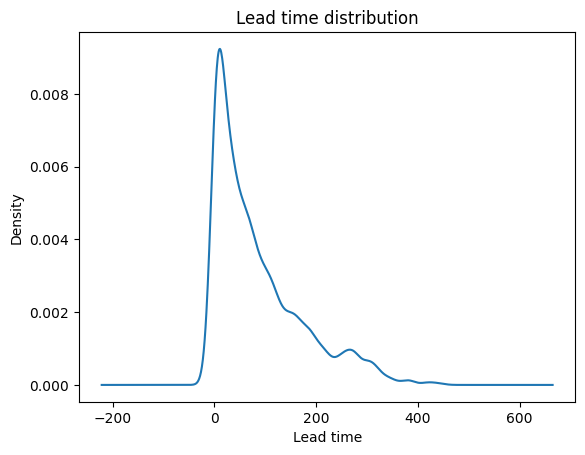

In [11]:
df['lead_time'].plot(kind='kde')
plt.xlabel('Lead time')
plt.title('Lead time distribution')

This shows there is one large peak and some bumps following it, but it is not clear how this related to booking status. Below, we show the lead time distribution by booking status.

Text(0.5, 1.0, 'Lead time distribution separated by booking status')

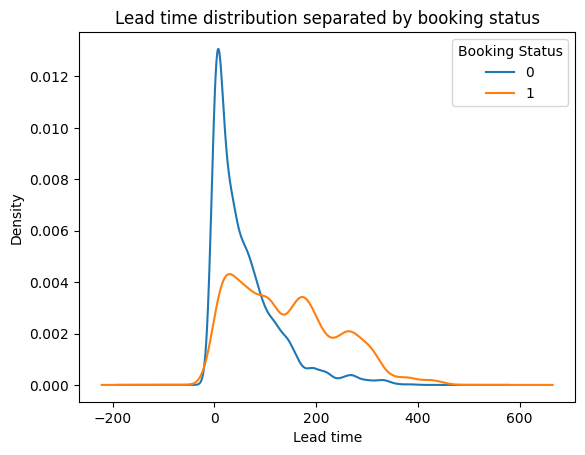

In [12]:
df.groupby('booking_status')['lead_time'].plot(kind='kde')
plt.legend(['0', '1'], title='Booking Status')
plt.xlabel('Lead time')
plt.title('Lead time distribution separated by booking status')

**Class imbalance**:

The number of those who cancelled their booking (1) and those who didn't (0) is below.

In [13]:
df['booking_status'].value_counts()

0    12195
1     5942
Name: booking_status, dtype: int64

**Initial observations about the data:**
* It is not a very high-dimensional dataset (before pre-processing, which may had columns through one-hot encoding)
* There are a few moderate-sized correlations between different features (this may be an issue in linear models)
* There are no missing values
* The target feature is binary
* There is some class imbalance (around half as many cancelled bookings as non-cancelled) but it is not as imbalanced as might be expected.




**Appropriate metric/metrics for assessment:**

The dataset page describes cancellations as 'less desirable and possibly revenue-diminishing for hotels'. We can assume that for this application, it is more important to correctly detect cancellations (booking_status=1) rather than non-cancellations (booking_status=0). 

False negatives may cause the hotel to lose money, and so we want to minimise them. Therefore high **recall** is more important than high precision. 
However, a given model may give different recall and precision scores across different thresholds. To account for this, it may be useful to look at the **PR plot and ROC curve**, and the associated **AP and AUROC scores**. 

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [14]:
import math as m
#NOTE all these should not be used for every model (e.g. use subset for linear models)

train_df_all = train_df
test_df_all = test_df

#transformed lead time:
#explanation: it seems that larger lead times are related to higher prob. of cancellation (from above). 
#             It is possible that this relationship is not linear. It may be sublinear, as it is possible
#             the efect would decrease over time. This could be modelled with a log relationship.
#             Taking the log(lead_time) is a problem because lead_time can be 0. Therefore I used a 'pseudo 
#             logarithm', as described in the source below. It has the following properties:
#             1. pseudoLog10(x) is defined for all real x.
#             2. pseudoLog10(0) = 0.
#             3. pseudoLog10(-x) = -pseudoLog10(x).
#reference: https://win-vector.com/2012/03/01/modeling-trick-the-signed-pseudo-logarithm/
train_df_all['log_lead_time'] = train_df['lead_time'].transform(lambda x: m.asinh(x/2)/m.log10(10))
test_df_all['log_lead_time'] = test_df['lead_time'].transform(lambda x: m.asinh(x/2)/m.log10(10))

#binary children:
# explanation: it is possible that the number of children is less important than whether there are children at all.
#              therefore a binary column is added where bin_children=1 means there are children, and 
#              bin_children=0 means there are non3.
train_df_all['bin_children'] = np.where(train_df['no_of_children'] > 0, 1, 0)
test_df_all['bin_children'] = np.where(test_df['no_of_children'] > 0, 1, 0)

#binary adults:
# explanation: it appears there are some cases where number of adults is 0 as well. This may be an exceptional case
#              and could perhaps be related to cancellations. 
train_df_all['bin_adults'] = np.where(train_df['no_of_adults'] > 0, 1, 0)
test_df_all['bin_adults'] = np.where(test_df['no_of_adults'] > 0, 1, 0)

#categorical arrival date:
# explanation: arrival_date has a lot of different values, and does not seem that useful by itself. However, it is possible 
# there is some relationship to which part of the month someone books for, and cancellations. To test this, arrival_date is grouped
# into one of three sections in the new column cat_arrival_date
train_df_all['cat_arrival_date'] = np.where(train_df['arrival_date'] > 20, 3, 
                                      (np.where(train_df['arrival_date'] > 10, 2, 1)))
test_df_all['cat_arrival_date'] = np.where(test_df['arrival_date'] > 20, 3, 
                                      (np.where(test_df['arrival_date'] > 10, 2, 1)))


<class 'NameError'>: name 'train_df' is not defined

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [15]:
# month could potentially be ordinal, but this may assume that the relationship will be linear
# however e.g. there may be more bookings in summer, or some other period, rather than an increase/decrease 
# along the year. Therefore month is kept as categorical.
# the same argument applies to 
features_cat = ['type_of_meal_plan',
                'room_type_reserved',
                'arrival_year', #only two values - could be considered bin but do not want to drop one
                'arrival_month', #see above
                'market_segment_type', #there may be some ordering but we are not told
                'cat_arrival_date' #see above
               ]
#features_ord = []
features_bin = ['required_car_parking_space',
                'repeated_guest',
                'bin_children',
                'bin_adults'
               ]
features_num = ['no_of_adults',
                'no_of_children',
                'no_of_weekend_nights',
                'no_of_week_nights',
                'lead_time',
                'no_of_previous_cancellations',
                'no_of_previous_bookings_not_canceled',
                'avg_price_per_room',
                'no_of_special_requests',
                'log_lead_time'                
               ]
features_drop = ['arrival_date'] 
#features_pass = []

target = 'booking_status'

In [16]:
#based on lecture 6

transformer_categorical = OneHotEncoder(handle_unknown="ignore")
transformer_numeric = StandardScaler()

preprocessor = make_column_transformer(
    (transformer_categorical, features_cat),
    (transformer_numeric, features_num),
    ("passthrough", features_bin),
    ("drop", features_drop)
)
preprocessor

<class 'NameError'>: name 'OneHotEncoder' is not defined

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [17]:
X_train = train_df_all.drop(columns='booking_status')
y_train = train_df_all['booking_status']
X_test = test_df_all.drop(columns='booking_status')
y_test = test_df_all['booking_status']

<class 'NameError'>: name 'train_df_all' is not defined

In [18]:
scoring_base = ["accuracy"] #"recall", "precision", "f1"]
pipe_baseline = make_pipeline(preprocessor, DummyClassifier(strategy="most_frequent"))
scores_baseline = cross_validate(pipe_baseline, X_train, y_train, scoring=scoring_base)
pd.DataFrame(scores_baseline).mean()

<class 'NameError'>: name 'make_pipeline' is not defined

As it is predicting the most frequent class, it is always predicting a negative. Accuracy is around 67% (which is the frequency of the negative class).
Other metrics such as recall, precision and f1 are left out as they would be 0.

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

**Scores without optimised hyperparameters**

In [19]:
#Without hyperparamenter tuning:
#TODO check if I should use Ridge here?
#TODO check that C is the only HP to optimise?
scoring = ["accuracy", "recall", "precision", "f1"]
pipe_linear1 = make_pipeline(preprocessor, LogisticRegression(max_iter = 225)) #anyting lower causes warning
scores_linear1 = cross_validate(pipe_linear1, X_train, y_train, scoring=scoring)
#pd.DataFrame(scores_linear1)
pd.concat(
    [pd.DataFrame(scores_linear1).mean(), pd.DataFrame(scores_linear1).std()],
    axis=1, keys=["validation scores", "stdev"]
)


<class 'NameError'>: name 'make_pipeline' is not defined

In [20]:
#based on lecture 8
from scipy.stats import loguniform
#Hyperparameter tuning:
# Doing grid search because there is only one HP and not many values
param_grid = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(
    pipe_linear1, param_grid, cv=5, n_jobs=-1, return_train_score=True
)

<class 'NameError'>: name 'GridSearchCV' is not defined

In [21]:
grid_search.fit(X_train, y_train)
grid_search

<class 'NameError'>: name 'grid_search' is not defined

In [22]:
print("Best score from grid search:", grid_search.best_score_)

<class 'NameError'>: name 'grid_search' is not defined

In [23]:
print("Best params from grid search:", grid_search.best_params_)

<class 'NameError'>: name 'grid_search' is not defined

**Scores with optimised hyperparameter**

In [24]:
scoring = ["accuracy", "recall", "precision", "f1"]
pipe_linear2 = make_pipeline(preprocessor, LogisticRegression(C=0.1, max_iter = 225)) #anyting lower causes warning
scores_linear2 = cross_validate(pipe_linear2, X_train, y_train, scoring=scoring)
pd.concat(
    [pd.DataFrame(scores_linear2).mean(), pd.DataFrame(scores_linear2).std()],
    axis=1, keys=["validation scores", "stdev"]
)


<class 'NameError'>: name 'make_pipeline' is not defined

We can also look at the ROC and PR curves:

In [25]:
#Code below based on lecture 9
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, grid_search.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, grid_search.predict(X_test)),
    recall_score(y_test, grid_search.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

<class 'NameError'>: name 'y_test' is not defined

In [26]:
from sklearn.metrics import average_precision_score

ap_lr = average_precision_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("Average precision of logistic regression: {:.3f}".format(ap_lr))

<class 'NameError'>: name 'y_test' is not defined

In [27]:
#TODO check it is ok to use test data here? Or do I need a separate validation set?
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

<class 'NameError'>: name 'y_test' is not defined

In [28]:
from sklearn.metrics import roc_auc_score

roc_lr = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("AUC for logistic regression: {:.3f}".format(roc_lr))

<class 'NameError'>: name 'y_test' is not defined

**Summary**

The accuracy is fairly high, but the recall is not vey good, and is worse than the precision. 
The PR curve shows that having a high recall would require a fairly low precision. The ROC curve shows that, similarly, high recall would lead to a fairly high false positive rate. 
These metrics mean, in general, this model may not be suitable for this application. However if the client does not mind high false positive rates/low precision, it could be possible to set the threshold such that there is high recall.

Some ways to improve the model might be to weight the classes to help with class imbalance or to change the penalty type.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [29]:
import xgboost as xgb

**XGBoost**

Typically has better scores than a random forest, without being too slow. 

In [30]:
scoring = ["accuracy", "recall", "precision", "f1"]
pipe_xgb1 = make_pipeline(preprocessor, XGBClassifier()) 
scores_xgb1 = cross_validate(pipe_xgb2, X_train, y_train, scoring=scoring)
pd.concat(
    [pd.DataFrame(scores_xgb1).mean(), pd.DataFrame(scores_xgb1).std()],
    axis=1, keys=["validation scores", "stdev"]
)

<class 'NameError'>: name 'make_pipeline' is not defined

In [31]:
#SVM
from sklearn.svm import SVC
scoring = ["accuracy", "recall", "precision", "f1"]
pipe_svc = make_pipeline(preprocessor, SVC()) 
scores_svc = cross_validate(pipe_svc, X_train, y_train, scoring=scoring)
pd.concat(
    [pd.DataFrame(scores_svc).mean(), pd.DataFrame(scores_svc).std()],
    axis=1, keys=["validation scores", "stdev"]
)

<class 'NameError'>: name 'make_pipeline' is not defined

In [32]:
#Get model w/ best recall and look at the ROC and PR curves

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

In [33]:
#consider colinearities from feat. engineering

In [34]:
#based on lecture 13

In [35]:
from sklearn.feature_selection import RFE

# create ranking of features
rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=5)

from sklearn.feature_selection import RFECV
pipe_rfecv = make_pipeline(
    preprocessor,
    RFECV(LogisticRegression(max_iter=2000, C=0.1)),
    XGBClassifier(random_state=123),
)

pd.DataFrame(cross_validate(pipe_9, X_train, y_train_FE, return_train_score=True, scoring="recall")).mean()

<class 'NameError'>: name 'LogisticRegression' is not defined

In [36]:
print(rfe.ranking_)

<class 'NameError'>: name 'rfe' is not defined

In [37]:
len(X_train_scaled.columns)
#TODO ADD column names

<class 'NameError'>: name 'X_train_scaled' is not defined

In [38]:
pd.DataFrame({
    'feature': list(X_train.columns[0:4]),
    'rank': rfe.ranking_
})

<class 'NameError'>: name 'X_train' is not defined

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [39]:
#based on lecture 11
from xgboost import XGBClassifier

pipe_xgb = make_pipeline(
    preprocessor, XGBClassifier(random_state=123, eval_metric="logloss", verbosity=0)
)

<class 'NameError'>: name 'make_pipeline' is not defined

In [40]:
param_grid_xgb = {
    "xgbclassifier__n_estimators": [1.0, 10, 100, 1000, 10000],
    "xgbclassifier__learning_rate":[0.001, 0.01, 0.1, 1.0, 10, 100]
}

random_search_xgb = RandomizedSearchCV(
    pipe_xgb, param_distributions=param_grid_xgb, n_jobs=-1, n_iter=10, cv=5, random_state=123
)

<class 'NameError'>: name 'RandomizedSearchCV' is not defined

In [41]:
random_search_xgb.fit(X_train, y_train)
print("Best params from grid search:", random_search_xgb.best_params_)

<class 'NameError'>: name 'random_search_xgb' is not defined

In [42]:
scoring = ["accuracy", "recall", "precision", "f1"]
pipe_xgb2 = make_pipeline(preprocessor, XGBClassifier(n_estimators=100, learning_rate = 0.1)) 
scores_xgb2 = cross_validate(pipe_xgb2, X_train, y_train, scoring=scoring)
pd.concat(
    [pd.DataFrame(scores_xgb2).mean(), pd.DataFrame(scores_xgb2).std()],
    axis=1, keys=["validation scores", "stdev"]
)

<class 'NameError'>: name 'make_pipeline' is not defined

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 